## Observations and Insights 

In [192]:
# Dependencies and Setup
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results = study_results.dropna(axis=1)
merged = mouse_metadata.merge(study_results, on='Mouse ID')
merged.to_csv("output.csv", index=False)

# Display the data table for preview, and drop extra columns
merged_df = pd.read_csv("output.csv")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [193]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [194]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Locating data with duplicates of both criteria, and displaying by Mouse ID
duplicates_df = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID","Timepoint"], keep = False) == True]
duplicates_df = pd.DataFrame(duplicates_df["Mouse ID"].drop_duplicates())
duplicates_df

,Mouse ID
908,g989


In [195]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data_df = pd.DataFrame(duplicates_df)
dup_data = duplicate_data_df.merge(merged_df, on = "Mouse ID")
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [196]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata_df = merged_df.copy()
cleandata_df = cleandata_df.loc[~(cleandata_df["Mouse ID"].isin(duplicates_df["Mouse ID"]))]
cleandata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [197]:
# Checking the number of mice in the clean DataFrame.
cleandata_df["Mouse ID"].nunique()

248

## Summary Statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculating each statistic for Tumor Volume after grouping by Drug Regimen

mean_df = cleandata_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_df = mean_df.reset_index()
mean_df = mean_df.rename(columns={"Tumor Volume (mm3)":"Mean"})

median_df = cleandata_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_df = median_df.reset_index()
median_df = median_df.rename(columns={"Tumor Volume (mm3)":"Median"})

var_df = cleandata_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
var_df = var_df.reset_index()
var_df = var_df.rename(columns={"Tumor Volume (mm3)":"Variance"})

std_dev_df = cleandata_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
std_dev_df = std_dev_df.reset_index()
std_dev_df = std_dev_df.rename(columns={"Tumor Volume (mm3)":"Std Dev"})

sem_df = cleandata_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sem_df = sem_df.reset_index()
sem_df = sem_df.rename(columns={"Tumor Volume (mm3)":"SEM"})

# Creating summary statistics table using imported reduce function from functools
stats = [mean, median, variance, std_dev, sem]
summary_stats_df = reduce(lambda left,right: pd.merge(left,right,on=['Drug Regimen'], how='outer'), stats)
summary_stats_df

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,40.676,41.558,24.948,4.995,0.329
1,Ceftamin,52.591,51.776,39.290,6.268,0.470
2,Infubinol,52.885,51.821,43.129,6.567,0.492
3,Ketapril,55.236,53.699,68.554,8.280,0.604
4,Naftisol,54.332,52.509,66.173,8.135,0.596
5,Placebo,54.034,52.289,61.168,7.821,0.581
6,Propriva,52.321,50.446,43.852,6.622,0.544
7,Ramicane,40.217,40.673,23.487,4.846,0.321
8,Stelasyn,54.233,52.432,59.451,7.710,0.573
9,Zoniferol,53.237,51.818,48.533,6.967,0.516


In [199]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
cleandata_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Mice in Each Drug Regimen'}, xlabel='Drug Regimen'>

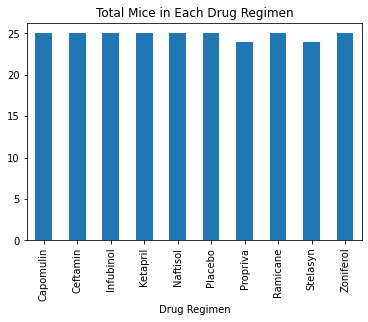

In [212]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Calculating total number of mice grouped by Drug Regimen
mice_num = cleandata_df.groupby("Drug Regimen")["Mouse ID"].nunique()
regimen = cleandata_df["Drug Regimen"].unique()

mice_num_df = pd.Series(mice_num)

mice_num_df.plot.bar(x="Drug Regimen", y="Number of Mice", rot=90, title="Total Mice in Each Drug Regimen")

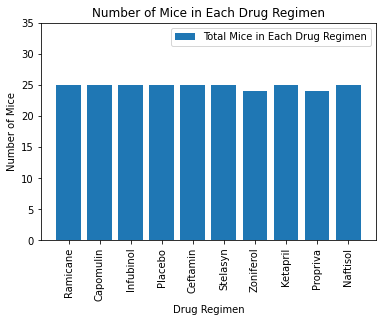

In [206]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Calculating total number of mice grouped by Drug Regimen
mice_num = cleandata_df.groupby("Drug Regimen")["Mouse ID"].nunique()
regimen = cleandata_df["Drug Regimen"].unique()

# Creating and displaying bar plot
plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.ylim([0, 35])

plt.bar(regimen, mice_num, label = "Total Mice in Each Drug Regimen")
plt.legend()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
